<a href="https://colab.research.google.com/github/rashmic20/Phase5_Project/blob/main/Vader_and_Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('restaurant_reviews_cleaned.csv')

In [ ]:
# Group by state and count the number of reviews
state_review_counts = df.groupby('state').size().reset_index(name='review_count')

# Display the review counts per state
print(state_review_counts)

   state  review_count
0     AB            51
1     AZ           306
2     CA           257
3     DE            50
4     FL          1239
5     ID           152
6     IL            45
7     IN           479
8     LA           890
9     MO           436
10    NJ           252
11    NV           293
12    PA          1084
13    TN           615


 Number of reviews per state

<ipython-input-7-78e72f1444d0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='review_count', data=state_review_counts, palette=red_palette)


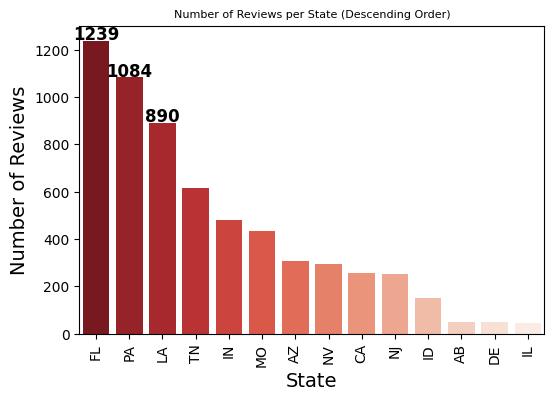

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by review_count in descending order
state_review_counts = state_review_counts.sort_values(by='review_count', ascending=False).reset_index(drop=True)

# Create a custom red palette where higher numbers are darker
red_palette = sns.color_palette("Reds", len(state_review_counts))
red_palette.reverse()  # Reverse the palette to make higher numbers darker

# Plotting the number of reviews per state in descending order with the custom red palette
plt.figure(figsize=(6,4))
sns.barplot(x='state', y='review_count', data=state_review_counts, palette=red_palette)
plt.title('Number of Reviews per State (Descending Order)', fontsize=8)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=90)

# Annotate the top 3 states
for i in range(3):
    plt.text(i, state_review_counts['review_count'][i] + 5,
             f'{state_review_counts["review_count"][i]}',
             color='black', ha="center", fontsize=12, fontweight='bold')

plt.show()


In [ ]:
df['review_length'] = df['cleaned_text'].apply(len)
plt.figure(figsize=(8, 4))
plt.hist(df['review_length'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

TypeError: object of type 'float' has no len()

Let's filter dataset for reviews from the states of Florida (FL).

In [ ]:
# Filter for reviews in FL
filtered_df = df[df['state'].isin(['FL'])]


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1239 entries, 2 to 6148
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     1239 non-null   object 
 1   user_id       1239 non-null   object 
 2   business_id   1239 non-null   object 
 3   stars_x       1239 non-null   float64
 4   date          1239 non-null   object 
 5   name          1239 non-null   object 
 6   city          1239 non-null   object 
 7   state         1239 non-null   object 
 8   postal_code   1239 non-null   object 
 9   latitude      1239 non-null   float64
 10  longitude     1239 non-null   float64
 11  stars_y       1239 non-null   float64
 12  review_count  1239 non-null   float64
 13  categories    1239 non-null   object 
 14  cleaned_text  1239 non-null   object 
 15  sentiment     1239 non-null   float64
dtypes: float64(6), object(10)
memory usage: 164.6+ KB


In [ ]:
filtered_df.head(3)

,review_id,user_id,business_id,stars_x,date,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,cleaned_text,sentiment
2,U8_ehvGLQzTK9drgHKObbA,OozcBexcgIKztqL49n8KxQ,_k8qEyZjGsGaCAtN_5EYSw,5.0,2019-09-30 16:14:24,Tropical Smoothie Cafe,Lutz,FL,33559,28.186591,-82.424543,3.5,13.0,"Restaurants, Food, Sandwiches, Juice Bars & Sm...",clean staff friendly fastwhoever made wrap mad...,1.0
5,nJL9JjmwFZ0JZyKTHiBq4Q,sDTUZlTkV99_AMRfch3A5Q,XV-jiJ6yb0LXlh4EyEWbqQ,1.0,2019-09-27 04:22:48,Joey's New York Pizza and Italian Restaurant,Palm Harbor,FL,34684,28.051185,-82.737053,3.5,183.0,"Italian, Pizza, Restaurants",tried place catering event rudely told lunch t...,0.0
8,xZqAdOML_vUoe2Jva1XEXg,_vV7CWVtVbYaHH7HT2EUvA,6vWKezveJpsWgjl5Cd3l-g,5.0,2019-09-27 19:43:16,Pal Campo Restaurant Tampa,Tampa,FL,33634,28.031686,-82.541086,3.0,164.0,"Latin American, Puerto Rican, Caribbean, Resta...",attentive staff amazing authentic spanish food...,1.0


In [ ]:
# Count the number of unique business_ids
total_business_count = filtered_df['business_id'].nunique()

# Display the result
print(f"Total number of unique businesses: {total_business_count}")

Total number of unique businesses: 380


In [ ]:
# Step 1: Count the number of reviews for each business
business_review_counts = filtered_df['business_id'].value_counts()

# Step 2: Filter the businesses that have more than 100 reviews
businesses_more_than_100 = business_review_counts[business_review_counts > 100].index

# Step 3: Filter the original DataFrame to keep only those rows
Cleaned_df = filtered_df[filtered_df['business_id'].isin(businesses_more_than_100)]
# Check the filtered data
print(f"Number of businesses with more than 100 reviews: {len(businesses_more_than_100)}")
print(f"Number of reviews in the filtered dataset: {filtered_df.shape[0]}")

Number of businesses with more than 100 reviews: 0
Number of reviews in the filtered dataset: 1239


In [ ]:
# Save the cleaned DataFrame as a CSV file
Cleaned_df.to_csv('filtered_reviews.csv', index=False)

# The file will be saved in the current working directory
print("Filtered DataFrame has been saved as 'filtered_reviews.csv'")

Filtered DataFrame has been saved as 'filtered_reviews.csv'


In [ ]:
# Count the number of reviews (length of the 'stars_x' column) for each state
review_counts = filtered_df.groupby('state')['stars_x'].count()

# Display the number of reviews for each state
print(review_counts)

state
FL    1239
Name: stars_x, dtype: int64


In [ ]:
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import spacy
import pandas as pd

# Download NLTK stopwords if needed
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = stopwords.words('english')

# Preprocess and tokenize the 'cleaned_text' column using simple_preprocess
texts = [simple_preprocess(doc) for doc in filtered_df['cleaned_text']]

# Function to remove stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Remove stopwords
texts_nostops = remove_stopwords(texts)

# Create bigram and trigram models
bigram = Phrases(texts_nostops, min_count=5, threshold=100)
trigram = Phrases(bigram[texts_nostops], threshold=100)

# Use Phraser for faster application of bigrams and trigrams
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Function to create bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Function to create trigrams
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form bigrams
texts_bigrams = make_bigrams(texts_nostops)

# Form trigrams
texts_trigrams = make_trigrams(texts_bigrams)

# Initialize spaCy 'en' model, keeping only tagger component (for lemmatization)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Function for lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Lemmatize the words, keeping only nouns, adjectives, verbs, and adverbs"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Lemmatize keeping only nouns, adjectives, verbs, and adverbs
texts_lemmatized = lemmatization(texts_trigrams)

# Create a Gensim dictionary
id2word = Dictionary(texts_lemmatized)

# Filter out extremes to limit the number of features
id2word.filter_extremes(no_below=1, no_above=0.5)

# Create a corpus: Term Document Frequency (BoW)
corpus = [id2word.doc2bow(text) for text in texts_lemmatized]

# Now the corpus and dictionary are ready for LDA modeling


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now we have id2word (the dictionary) and corpus (the term-document frequency) ready to be used for LDA modeling.

In [ ]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Function to compute coherence score and return the best model
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various numbers of topics.

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max number of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         update_every=1,
                         chunksize=100,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)
        model_list.append(model)

        # Compute the Coherence Score using 'c_v' coherence
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Compute coherence values for different numbers of topics
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=texts,
                                                        start=2, limit=20, step=1)

# Find the best model with highest coherence score
best_model_index = coherence_values.index(max(coherence_values))
best_model = model_list[best_model_index]

# Print the best number of topics and its coherence score
print(f"Best Model with {best_model.num_topics} topics has coherence score of {max(coherence_values):.4f}")

# Print the topics of the best model
for idx, topic in best_model.print_topics(-1):
    print(f'Topic {idx}: \nWords: {topic}\n')


/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Best Model with 4 topics has coherence score of 0.4591
Topic 0: 
Words: 0.024*"good" + 0.024*"food" + 0.018*"place" + 0.018*"great" + 0.014*"go" + 0.013*"order" + 0.013*"get" + 0.012*"service" + 0.010*"back" + 0.010*"come"

Topic 1: 
Words: 0.012*"soft" + 0.009*"turn" + 0.009*"healthy" + 0.009*"phenomenal" + 0.009*"support" + 0.008*"true" + 0.008*"almost" + 0.007*"pleasant" + 0.006*"awful" + 0.006*"crunchy"

Topic 2: 
Words: 0.018*"order" + 0.017*"ask" + 0.015*"say" + 0.014*"take" + 0.014*"tell" + 0.012*"table" + 0.012*"minute" + 0.012*"get" + 0.010*"never" + 0.009*"come"

Topic 3: 
Words: 0.014*"cuban" + 0.011*"incredible" + 0.009*"sausage" + 0.009*"café" + 0.008*"spice" + 0.008*"platter" + 0.008*"morning" + 0.008*"ingredient" + 0.007*"brisket" + 0.007*"move"



In [ ]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.7 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # For Gensim >= 4.0.0

# Prepare the visualization data for pyLDAvis
lda_display = gensimvis.prepare(best_model, corpus, id2word, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluate the model

The second model with 4 topics is performing better as compared to previous model with 5 topics. The topics are more distinct with less overlap, and the salient terms are more evenly distributed, indicating that this model is better at capturing different themes within the dataset.

###Model Interpretation
Intertopic Distance Map - This map provides a visual representation of how distinct the topics are from each other in the topic space.

Separation: Topics are more separated compared to the first image, especially Topic 1 and Topic 4, which are quite distinct.
Overlap: There is less overlap between topics, indicating that the topics might be capturing more distinct themes.
Spread: The topics are more evenly spread, suggesting better differentiation.

This suggests that the LDA model represented in the second image has a more coherent and distinct topic structure making it the better-performing model of the two.

###Summary of Labels

Labeling topics in an LDA model involves interpreting the most prominent words in each topic and giving the topic a descriptive name based on those words.



Topic 0: Dining Experience (words like go, time, place, restaurant, eat suggest that this topic is about the overall experience of dining out, including the actions of going out, spending time, and eating at a restaurant).

Topic 1: Food Quality and Flavor (words like order, chicken, good, pizza, fry, sauce, taste, and flavor, which indicates a focus on the quality and flavor of the food, particularly items like chicken, pizza, and fries).

Topic 2: Service and Wait Time (words like order, wait, say, come, ask, table, tell, take, minute, and customer" point towards service-related aspects of dining, including the time spent waiting, interactions with staff, and customer service).

Topic 3: Positive Reviews (words like good, great, food, service, place, love, amazing, staff, and nice indicate a focus on positive aspects of the dining experience, such as good service, great food, and a pleasant atmosphere.)

In [ ]:
# Dictionary of topic numbers to short topic labels
topic_dict = {
    0: 'Food & Dishes',
    1: 'Dining Experience',
    2: 'Positive Feedback',
    3: 'Service Issues'
}

# Assuming 'assigned_topics' is the list of most probable topic numbers assigned to each review
# Map the assigned topic numbers to the short topic labels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Function to extract the dominant topic for each document
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()
    # List to store the data for each row
    all_rows = []

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the dominant topic, its percentage contribution, and the keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # Dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                # Append the data for this row to the list
                all_rows.append([int(topic_num), round(prop_topic, 4), topic_keywords])
            else:
                break
    # Create the DataFrame from the list of rows
    sent_topics_df = pd.DataFrame(all_rows, columns=['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords'])

    # Reset the index of the Series to match the DataFrame
    texts = texts.reset_index(drop=True)

    # Add the original texts
    sent_topics_df = pd.concat([sent_topics_df, texts], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Review_Text']

    return sent_topics_df

# Apply the function to get the dominant topic for each review
df_topic_reviews = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=filtered_df['cleaned_text'])

# Display the DataFrame with dominant topics and reviews
print(df_topic_reviews.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Dominant_Topic  Topic_Perc_Contrib  \
0               0              0.8368   
1               0              0.5591   
2               0              0.8547   
3               0              0.8761   
4               0              0.9373   

                                            Keywords  \
0  good, food, place, great, go, order, get, serv...   
1  good, food, place, great, go, order, get, serv...   
2  good, food, place, great, go, order, get, serv...   
3  good, food, place, great, go, order, get, serv...   
4  good, food, place, great, go, order, get, serv...   

                                         Review_Text  
0  clean staff friendly fastwhoever made wrap mad...  
1  tried place catering event rudely told lunch t...  
2  attentive staff amazing authentic spanish food...  
3  come town never bad coffee staff always helpfu...  
4  unpretentious gem hidden seminole heights grea...  


Step 3: Perform Sentiment Analysis Using VADER

In [ ]:
pip install vaderSentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']  # Compound score summarizes the sentiment

# Apply the sentiment analysis to each review in the DataFrame
df_topic_reviews['Sentiment_Score'] = df_topic_reviews['Review_Text'].apply(get_sentiment)

# Display the DataFrame with sentiment scores
print(df_topic_reviews.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Dominant_Topic  Topic_Perc_Contrib  \
0               0              0.8368   
1               0              0.5591   
2               0              0.8547   
3               0              0.8761   
4               0              0.9373   

                                            Keywords  \
0  good, food, place, great, go, order, get, serv...   
1  good, food, place, great, go, order, get, serv...   
2  good, food, place, great, go, order, get, serv...   
3  good, food, place, great, go, order, get, serv...   
4  good, food, place, great, go, order, get, serv...   

                                         Review_Text  Sentiment_Score  
0  clean staff friendly fastwhoever made wrap mad...           0.9601  
1  tried place catering event rudely told lunch t...          -0.3283  
2  attentive staff amazing authentic spanish food...           0.8689  
3  come town never bad coffee staff always helpfu...           0.9770  
4  unpretentious gem hidden seminole heights grea...    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-106-55c5869268e0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dominant_Topic', y='Avg_Sentiment_Score', data=topic_sentiment_summary, palette='viridis')


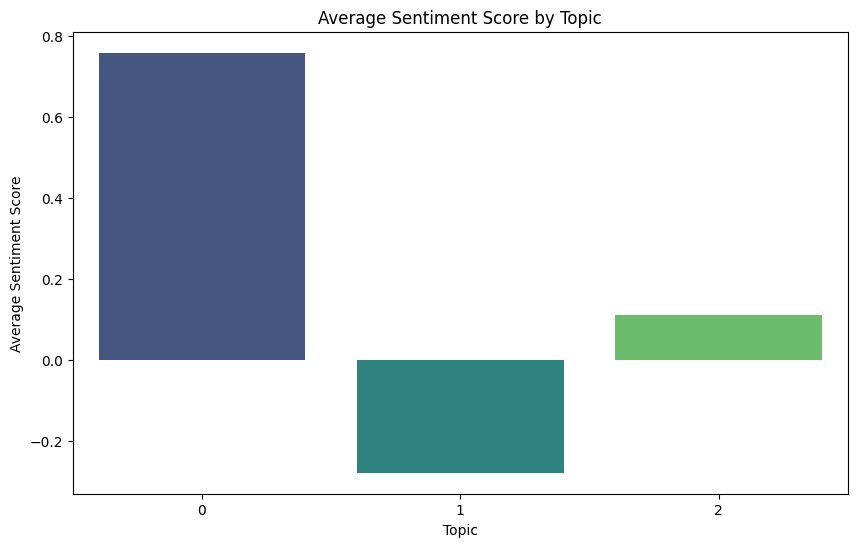

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by topics and calculate average sentiment score
topic_sentiment_summary = df_topic_reviews.groupby('Dominant_Topic').agg({
    'Sentiment_Score': 'mean',
    'Review_Text': 'count'
}).reset_index()

# Rename columns
topic_sentiment_summary.columns = ['Dominant_Topic', 'Avg_Sentiment_Score', 'Num_Reviews']

# Plot the average sentiment score by topic
plt.figure(figsize=(10, 6))
sns.barplot(x='Dominant_Topic', y='Avg_Sentiment_Score', data=topic_sentiment_summary, palette='viridis')
plt.title('Average Sentiment Score by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.show()

In [ ]:
# Save the DataFrame to CSV
df_topic_reviews.to_csv('topics_and_sentiments.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
